In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [ ]:
data = pd.read_csv('UPLOAD YOUR DATASET', skiprows=2, header=1)
data.head()

,Summary external debt data by debtor type,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Total External debt stocks,427245.1,457507.4,478831,455541.9,511575.7,521175.7,561017.4,564979.3,611987.2,615516,646787.1
1,Use of IMF Credit and SDR allocations,6126.5,5763.7,5512.8,5348.1,5665.6,5532.9,5501.2,5729.8,23160.2,22022.6,22201.7
2,Long-term external debt,328412.5,366169.3,391755.4,366260.9,408301.5,411718.8,448736.6,455716.5,474183.4,465622.6,498265.2
3,Public and publicly guaranteed sector,121461.8,152515.2,162310.9,153013.3,183017.5,180540,192007.5,192805.1,205281.7,205218.3,214915.7
4,Public sector,121460.9,152515.2,162310.9,153013.3,183017.5,180540,192007.5,192805.1,205281.7,205218.3,214915.7


In [36]:
data.columns

Index(['Summary external debt data by debtor type', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [37]:
data.isnull().sum()

Summary external debt data by debtor type     0
Unnamed: 1                                   10
Unnamed: 2                                   10
Unnamed: 3                                   10
Unnamed: 4                                   10
Unnamed: 5                                   10
Unnamed: 6                                   10
Unnamed: 7                                   10
Unnamed: 8                                   10
Unnamed: 9                                   10
Unnamed: 10                                  10
Unnamed: 11                                  10
dtype: int64

In [38]:
new_columns = ['Indicator Name', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
data.columns = new_columns

print(data.columns)

Index(['Indicator Name', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object')


In [39]:
data.replace('..', pd.NA, inplace=True)

data.dropna(how='all', inplace=True)

print(data.isnull().sum())

Indicator Name     0
2013              10
2014              10
2015              13
2016              13
2017              13
2018              13
2019              13
2020              13
2021              13
2022              13
2023              13
dtype: int64


In [40]:
year_cols = data.columns[1:]
data[year_cols] = data[year_cols].apply(pd.to_numeric)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  69 non-null     object 
 1   2013            59 non-null     float64
 2   2014            59 non-null     float64
 3   2015            56 non-null     float64
 4   2016            56 non-null     float64
 5   2017            56 non-null     float64
 6   2018            56 non-null     float64
 7   2019            56 non-null     float64
 8   2020            56 non-null     float64
 9   2021            56 non-null     float64
 10  2022            56 non-null     float64
 11  2023            56 non-null     float64
dtypes: float64(11), object(1)
memory usage: 6.6+ KB
None


In [41]:
print(data[data['Indicator Name'] == 'Total External Debt Stocks'].shape)

(0, 12)


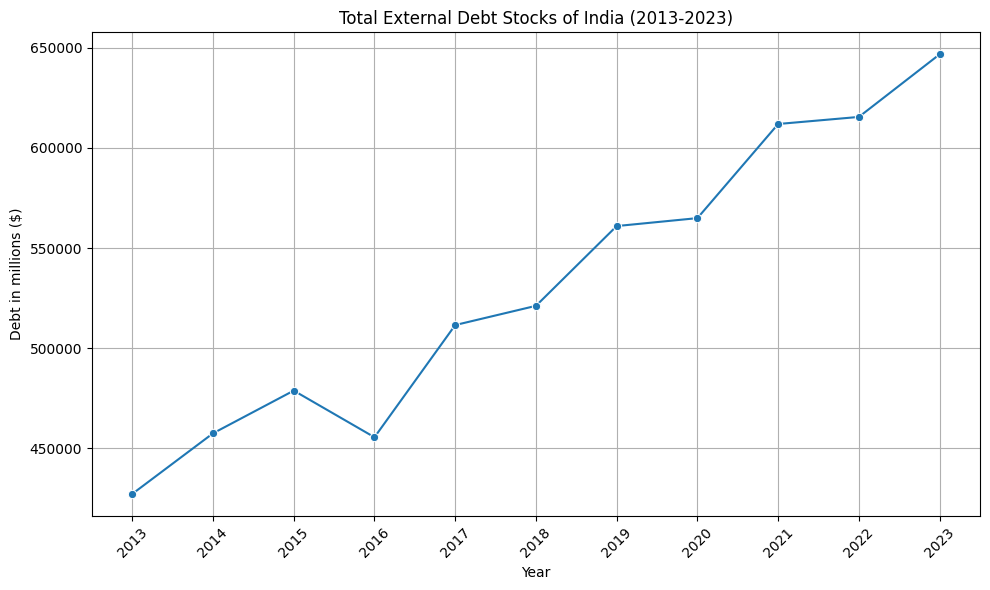

In [42]:
data.columns = ['Indicator Name'] + [str(year) for year in range(2013, 2024)]


total_debt_row = data[data['Indicator Name'] == 'Total External debt stocks'].iloc[0]

years = total_debt_row.index[1:]
debt_values = pd.to_numeric(total_debt_row.values[1:], errors='coerce')

# Create the line plot with the corrected data.
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=debt_values, marker='o')
plt.title('Total External Debt Stocks of India (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Debt in millions ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# SQL Analysis

In [43]:
connect = sqlite3.connect(':memory:')

data.to_sql('data', connect, index=False, if_exists='replace')

69

In [44]:
verification_query = 'SELECT * FROM data'
verification_result = pd.read_sql_query(verification_query, connect)
print(verification_result.head())


                          Indicator Name      2013      2014      2015  \
0             Total External debt stocks  427245.1  457507.4  478831.0   
1  Use of IMF Credit and SDR allocations    6126.5    5763.7    5512.8   
2                Long-term external debt  328412.5  366169.3  391755.4   
3  Public and publicly guaranteed sector  121461.8  152515.2  162310.9   
4                          Public sector  121460.9  152515.2  162310.9   

       2016      2017      2018      2019      2020      2021      2022  \
0  455541.9  511575.7  521175.7  561017.4  564979.3  611987.2  615516.0   
1    5348.1    5665.6    5532.9    5501.2    5729.8   23160.2   22022.6   
2  366260.9  408301.5  411718.8  448736.6  455716.5  474183.4  465622.6   
3  153013.3  183017.5  180540.0  192007.5  192805.1  205281.7  205218.3   
4  153013.3  183017.5  180540.0  192007.5  192805.1  205281.7  205218.3   

       2023  
0  646787.1  
1   22201.7  
2  498265.2  
3  214915.7  
4  214915.7  


Query 1: Get Total Debt for a Specific Year

Retrieve the total external debt for 2023.


In [45]:
query1 = '''
SELECT "2023"
FROM data
WHERE "Indicator Name" = 'Total External debt stocks';
'''
result = pd.read_sql_query(query1, connect)

print("Result:")
print(result)



Result:
       2023
0  646787.1


Query 2: Calculate the Percentage Change in Debt

Find the percentage increase in total external debt from 2013 to 2023.

In [46]:
query2 = '''
SELECT ('2023' - '2013') * 100.0/'2013' AS Percentage_Increase
FROM data
WHERE "Indicator Name" = 'Total External debt stocks';
'''
result = pd.read_sql_query(query2, connect)

print("Result:")
print(result)

Result:
   Percentage_Increase
0             0.496771


Query 3: Compare Debt Ratios for the Latest Year

Compare the External debt stocks to exports (%) and External debt stocks to GNI (%) for the year 2023.

In [47]:
query3 = '''
SELECT
    "Indicator Name",
    "2023"
FROM data
WHERE
    "Indicator Name" IN ('External debt stocks to exports (%)', 'External debt stocks to GNI (%)');
'''
result = pd.read_sql_query(query3, connect)

print("Result:")
print(result)

Result:
                        Indicator Name  2023
0  External debt stocks to exports (%)  79.7
1      External debt stocks to GNI (%)  18.4


Query 4: Find the Year with the Highest Debt Service to Exports Ratio

Determine which year had the highest debt service to exports ratio.

In [49]:
query4 = '''
SELECT
    '2013' AS Year, "2013" AS Value FROM data WHERE "Indicator Name" = 'Debt service to exports (%)'
UNION ALL
SELECT
    '2014', "2014" FROM data WHERE "Indicator Name" = 'Debt service to exports (%)'
UNION ALL
SELECT
    '2015', "2015" FROM data WHERE "Indicator Name" = 'Debt service to exports (%)'
UNION ALL
SELECT
    '2016', "2016" FROM data WHERE "Indicator Name" = 'Debt service to exports (%)'
UNION ALL
SELECT
    '2017', "2017" FROM data WHERE "Indicator Name" = 'Debt service to exports (%)'
UNION ALL
SELECT
    '2018', "2018" FROM data WHERE "Indicator Name" = 'Debt service to exports (%)'
UNION ALL
SELECT
    '2019', "2019" FROM data WHERE "Indicator Name" = 'Debt service to exports (%)'
UNION ALL
SELECT
    '2020', "2020" FROM data WHERE "Indicator Name" = 'Debt service to exports (%)'
UNION ALL
SELECT
    '2021', "2021" FROM data WHERE "Indicator Name" = 'Debt service to exports (%)'
UNION ALL
SELECT
    '2022', "2022" FROM data WHERE "Indicator Name" = 'Debt service to exports (%)'
UNION ALL
SELECT
    '2023', "2023" FROM data WHERE "Indicator Name" = 'Debt service to exports (%)'
ORDER BY Value DESC
LIMIT 1;
'''
result = pd.read_sql_query(query4, connect)

print("Result:")
print(result)

Result:
   Year  Value
0  2014   18.6
